### HW04 Static Analysis

Since we cannot share real malware binary with you. We give you the pefile analysis result (by calling pefile_dump() ) and save the result in a dictionary. You have to practice writing a parser before analyzing the given pefile dump file.

### Download data


In [0]:
# Here is the dump dictionary.
!wget https://drive.google.com/uc?id=1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9 -O pef_dumpdict_40.pickle

--2020-04-13 06:07:07--  https://drive.google.com/uc?id=1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9
Resolving drive.google.com (drive.google.com)... 108.177.112.138, 108.177.112.100, 108.177.112.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.112.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1gmjnufb3igeccrvo2j72nc1a2b4fr70/1586757975000/17174434063503717705/*/1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9 [following]
--2020-04-13 06:07:07--  https://doc-08-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1gmjnufb3igeccrvo2j72nc1a2b4fr70/1586757975000/17174434063503717705/*/1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9
Resolving doc-08-38-docs.googleusercontent.com (doc-08-38-docs.googleusercontent.com)... 108.177.120.132, 2607:f8b0:4001:c18::84
Connecting to doc-08-38-docs.googleusercontent.com (doc-08-38-docs.googleusercontent.com)|1

In [0]:
# The size should be 414677 bytes.
!ls -al

total 424
drwxr-xr-x 1 root root   4096 Apr 13 06:07 .
drwxr-xr-x 1 root root   4096 Apr 13 06:05 ..
drwxr-xr-x 1 root root   4096 Apr  9 16:10 .config
-rw-r--r-- 1 root root 414677 Apr 13 06:07 pef_dumpdict_40.pickle
drwxr-xr-x 1 root root   4096 Apr  3 16:24 sample_data


In [0]:
# It is stored in a pickle file.
# You can retrive it by using the following code.

import pickle
import os 

with open("/content/pef_dumpdict_40.pickle", 'rb') as fd:
  pef_dumpdicts = pickle.load(fd)

### A dump file example


In [0]:
# Get a 32-bit putty pe file
!wget https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe -O putty32.exe

--2020-04-13 06:07:15--  https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.73/w32/putty.exe [following]
--2020-04-13 06:07:15--  https://the.earth.li/~sgtatham/putty/0.73/w32/putty.exe
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 1096080 (1.0M) [application/x-msdos-program]
Saving to: ‘putty32.exe’

putty32.exe         100%[===================>]   1.04M  1.77MB/s    in 0.6s    

2020-04-13 06:07:16 (1.77 MB/s) - ‘putty32.exe’ saved [1096080/1096080]



In [0]:
!pip install pefile

     |████████████████████████████████| 71kB 2.4MB/s 
  Created wheel for pefile: filename=pefile-2019.4.18-cp36-none-any.whl size=60824 sha256=344bcd6095c63ebd1253ddd197f2b3fd56656a595b044f673fc2b35e42c1c0b1
  Stored in directory: /root/.cache/pip/wheels/1c/a1/95/4f33011a0c013c872fe6f0f364dc463a2588120820e40a30d8
Successfully built pefile


In [0]:
import pefile

pef = pefile.PE("/content/putty32.exe", True)
dump_dict = pef.dump_dict()

In [0]:
# a pefile dump dictionary has some information
# they are stored in different "keys"
print(dump_dict.keys())

dict_keys(['DOS_HEADER', 'NT_HEADERS', 'FILE_HEADER', 'Flags', 'OPTIONAL_HEADER', 'DllCharacteristics', 'PE Sections', 'Directories', 'Version Information', 'Imported symbols', 'Resource directory', 'LOAD_CONFIG', 'Base relocations'])


In [0]:
# show one of the data in 'DOS_HEADER' key
# and it looks like a python dictionary
# you can put this data in a json or a dictionaary structure for further analysis
print(dump_dict['DOS_HEADER'])

{'Structure': 'IMAGE_DOS_HEADER', 'e_magic': {'FileOffset': 0, 'Offset': 0, 'Value': 23117}, 'e_cblp': {'FileOffset': 2, 'Offset': 2, 'Value': 120}, 'e_cp': {'FileOffset': 4, 'Offset': 4, 'Value': 1}, 'e_crlc': {'FileOffset': 6, 'Offset': 6, 'Value': 0}, 'e_cparhdr': {'FileOffset': 8, 'Offset': 8, 'Value': 4}, 'e_minalloc': {'FileOffset': 10, 'Offset': 10, 'Value': 0}, 'e_maxalloc': {'FileOffset': 12, 'Offset': 12, 'Value': 0}, 'e_ss': {'FileOffset': 14, 'Offset': 14, 'Value': 0}, 'e_sp': {'FileOffset': 16, 'Offset': 16, 'Value': 0}, 'e_csum': {'FileOffset': 18, 'Offset': 18, 'Value': 0}, 'e_ip': {'FileOffset': 20, 'Offset': 20, 'Value': 0}, 'e_cs': {'FileOffset': 22, 'Offset': 22, 'Value': 0}, 'e_lfarlc': {'FileOffset': 24, 'Offset': 24, 'Value': 64}, 'e_ovno': {'FileOffset': 26, 'Offset': 26, 'Value': 0}, 'e_res': {'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}, 'e_oemid': {'FileOffset': 36, 'Offset': 36, 'Value': 0}, 'e_oeminfo': {'FileOffset': 

In [0]:
# for eample, I put it in a dictionaty
# now I can easily retrive the info stored in it by keys
dos_header_dict = dict(dump_dict['DOS_HEADER'])
print(dos_header_dict.keys())

print(dos_header_dict['Structure'])  # name
print(dos_header_dict['e_magic'])  # e_magic

dict_keys(['Structure', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc', 'e_ovno', 'e_res', 'e_oemid', 'e_oeminfo', 'e_res2', 'e_lfanew'])
IMAGE_DOS_HEADER
{'FileOffset': 0, 'Offset': 0, 'Value': 23117}


In [0]:
# another example

file_header_dict = dict(dump_dict['FILE_HEADER'])
print(file_header_dict.keys())

print(file_header_dict['Machine'])
print(file_header_dict['NumberOfSections'])
print(file_header_dict['TimeDateStamp'])

dict_keys(['Structure', 'Machine', 'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable', 'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics'])
{'FileOffset': 124, 'Offset': 0, 'Value': 332}
{'FileOffset': 126, 'Offset': 2, 'Value': 7}
{'FileOffset': 128, 'Offset': 4, 'Value': '0x5D873EBE [Sun Sep 22 09:28:30 2019 UTC]'}


In [0]:
# You can even print all dump_dict to find some valueable infomation.
# pprint stands for pretty print, which makes you easier to view the data
import pprint
pprint.pprint(dump_dict['Imported symbols']) # change this to other keys

[[{'Characteristics': {'FileOffset': 729424, 'Offset': 0, 'Value': 734724},
   'FirstThunk': {'FileOffset': 729440, 'Offset': 16, 'Value': 736044},
   'ForwarderChain': {'FileOffset': 729432, 'Offset': 8, 'Value': 0},
   'Name': {'FileOffset': 729436, 'Offset': 12, 'Value': 743028},
   'OriginalFirstThunk': {'FileOffset': 729424, 'Offset': 0, 'Value': 734724},
   'Structure': 'IMAGE_IMPORT_DESCRIPTOR',
   'TimeDateStamp': {'FileOffset': 729428,
                     'Offset': 4,
                     'Value': '0x0        [Thu Jan  1 00:00:00 1970 UTC]'}},
  {'DLL': b'GDI32.dll', 'Hint': 41, 'Name': b'CreateBitmap'},
  {'DLL': b'GDI32.dll', 'Hint': 48, 'Name': b'CreateCompatibleBitmap'},
  {'DLL': b'GDI32.dll', 'Hint': 49, 'Name': b'CreateCompatibleDC'},
  {'DLL': b'GDI32.dll', 'Hint': 61, 'Name': b'CreateFontA'},
  {'DLL': b'GDI32.dll', 'Hint': 62, 'Name': b'CreateFontIndirectA'},
  {'DLL': b'GDI32.dll', 'Hint': 74, 'Name': b'CreatePalette'},
  {'DLL': b'GDI32.dll', 'Hint': 76, 'Name': b

### Analyze the downloaded data

In [0]:
# Now pef_dumpdict is what we want you to analyze.
# It combines 40 malware's pefile.dump_dict().

print(len(pef_dumpdicts))

40


In [0]:
# The id of the 40 malwares are
for key in pef_dumpdicts.keys():
  print(key)

07edeebc14b053fffdfb4dcc08959360
0cfab9961285ab6e04f449c6d09cec37
2c1e90810ca30865cbf4440118c4aa0f
412c8d4d6afc88391e6dad508106681a
656f628856a62f1dc14748bff4cee2e5
8595c554539a172534c95222260650e5
88b666fd4ef1c21f4051ad3f859ee5bd
8aa66c2a430c3545c542e8419de13385
e776d8d8d187bdb68f41dc9ccfc86444
ed1304342c5794cb0a55840253793b45
2650e58a609438ba18706f539b49a6af
2a5932a800123709eff21dbd2310e090
4271ba51876b1e931dd55b2ccff25789
52cae62ada8b02adae128e35686cbc16
774b71a232568ca7ea09c0a26b82f8e5
7b57508defc0934c69b98544b4bac185
8081b6b58cc3372ad62a5d8b6ce09c0b
8e6d8d46e4a7482b9475e6c5b211dc61
b4e89348aa9b635b8edce746f8231303
e0ad769d1bd2b9b6444796f99b52a43f
0c6e68a34804df907df26d7139b1f052
0e751a5b6db31895c283ddd9757477de
0f74a58af435599ec94eff2b72d5e55e
1d0ce31c6d7129a74e2921e8d161c752
2cceeae738cae520544e9d9fda9ca30e
2ea5285f04bc9a0b3008165779a382ec
2f45c7132f623cd7caea6d7965d53a0f
3b569cd1c63b83446420dd798a8622b7
3f07e530430d1d450bfeaf0a595109b1
4aa9b2104ac7c7602c4258a0f7ce2b44
17af47cdfd

In [0]:
# so the fist dump_dict is
first_dict = pef_dumpdicts['07edeebc14b053fffdfb4dcc08959360']

# you can now access the data you want
# for example print all sections and their info.
for sec in first_dict['PE Sections']:
  print(sec)

# or like this (as what we see in pefile demonstration)
print("\nName, Misc_VirtualSize, SizeOfRawData, Entropy, MD5")
for sec in first_dict['PE Sections']:
  print(sec['Name']['Value'], sec['Misc_VirtualSize']['Value'], sec['SizeOfRawData']['Value'], sec['Entropy'], sec['MD5'])

{'Structure': 'IMAGE_SECTION_HEADER', 'Name': {'FileOffset': 464, 'Offset': 0, 'Value': 'UPX0\\x00\\x00\\x00\\x00'}, 'Misc': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'Misc_PhysicalAddress': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'Misc_VirtualSize': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'VirtualAddress': {'FileOffset': 476, 'Offset': 12, 'Value': 4096}, 'SizeOfRawData': {'FileOffset': 480, 'Offset': 16, 'Value': 0}, 'PointerToRawData': {'FileOffset': 484, 'Offset': 20, 'Value': 1024}, 'PointerToRelocations': {'FileOffset': 488, 'Offset': 24, 'Value': 0}, 'PointerToLinenumbers': {'FileOffset': 492, 'Offset': 28, 'Value': 0}, 'NumberOfRelocations': {'FileOffset': 496, 'Offset': 32, 'Value': 0}, 'NumberOfLinenumbers': {'FileOffset': 498, 'Offset': 34, 'Value': 0}, 'Characteristics': {'FileOffset': 500, 'Offset': 36, 'Value': 3758096512}, 'Flags': ['IMAGE_SCN_CNT_UNINITIALIZED_DATA', 'IMAGE_SCN_MEM_EXECUTE', 'IMAGE_SCN_MEM_READ', 'IMAGE_SCN_MEM_WRITE'], 'Entr

In [0]:
# Here you can output the dll and windows api used by a pe file
# You may print dump_dict['Imported symbols'] first
# and try to locate the info you want to retrive.

api_dict = dict()
for records in first_dict['Imported symbols']:
  for record in records:
    if 'Name' in record:
      if isinstance(record['Name'], bytes):
        dll = record['DLL'].decode("ascii")
        name = record['Name'].decode("ascii")
        if dll not in api_dict:
          api_dict[dll] = set()
        api_dict[dll].add(name)

for dll in api_dict:
  print(dll)
  print("", api_dict[dll])

KERNEL32.DLL
 {'ExitProcess', 'GetProcAddress', 'LoadLibraryA'}
ADVAPI32.dll
 {'RegCloseKey'}
MSVCRT.dll
 {'rand'}
USER32.dll
 {'wsprintfA'}
WININET.dll
 {'InternetOpenA'}


In [0]:
for key in pef_dumpdicts.keys():
    for records in pef_dumpdicts[key]['Imported symbols']:
        for record in records:
            if "DLL" in record:
                print(record["DLL"])
    print("--------------------")

b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'ADVAPI32.dll'
b'MSVCRT.dll'
b'USER32.dll'
b'WININET.dll'
b'WS2_32.dll'
--------------------
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'ADVAPI32.dll'
b'MSVCRT.dll'
b'USER32.dll'
b'WININET.dll'
b'WS2_32.dll'
--------------------
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'ADVAPI32.dll'
b'MSVCRT.dll'
b'USER32.dll'
b'WININET.dll'
b'WS2_32.dll'
--------------------
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'ADVAPI32.dll'
b'MSVCRT.dll'
b'USER32.dll'
b'WININET.dll'
b'WS2_32.dll'
--------------------
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'ADVAPI32.dll'
b'MSVCRT.dll'
b'USER32.dll'
b'WININET.dll'
b'WS2_32.dll'
--------------------
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'ADVAPI32.dll'
b'MSVCRT.dll'
b'USER32.dll'
b'WININET.dll'
b'WS2_32.dll'
--------------------
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'KERNEL32.DLL'
b'ADVAPI32.dll'
b'MSVCRT.dll'
b'USER32.dll'
b'WININET.dll'
b'WS2_32.dll'
--------------------
b'KERN

### Extract more information

Now its your turn.
Try to buld a feature table for these 40 malwares.
Here is an example for api call.

In [0]:
api_set = set()
for key in pef_dumpdicts.keys(): # iter 40 malwares
  pef_dump_dict = pef_dumpdicts[key]
  for records in pef_dump_dict['Imported symbols']:
    for record in records:
      if 'Name' in record:
        if isinstance(record['Name'], bytes):
          name = record['Name'].decode("ascii")
          api_set.add(name)

api_list = list(api_set) 

In [0]:
api_list

['wsprintfA',
 'RegCloseKey',
 'InternetOpenA',
 'GetProcAddress',
 'LoadLibraryA',
 'ExitProcess',
 'rand']

Now you find an interesting thing, that all 40 malwares calls these 7 APIs. So it is impossible to distinguish them by using these 7 APIs. So please try to use some other features.

Hint #1: these malwares are packed. UPX may unpacked them.

Hint #2: these 40 malware samples are from 4 families. Can you classify or cluster them into 4 groups?

### Your solution

##### Step1. 整理欄位

In [0]:
# 將 PE File 欄位整理乾淨，產生 new_dict
new_dict = dict()
for key in pef_dumpdicts.keys():
    row = pef_dumpdicts[key]
    row_dict = dict()
    for row_key in row:
        if row[row_key] and type(row[row_key]) == list:
            if type(row[row_key][0]) == dict:
                for i in range(len(row[row_key])):
                    child_dict = row[row_key][i]
                    for child_key in child_dict:
                        if type(child_dict[child_key]) == list:
                            row_dict[row_key + "__" + str(i) + "__" + child_key] = tuple(child_dict[child_key])
                        elif type(child_dict[child_key]) == dict:
                            for grand_child_key in child_dict[child_key]:
                                row_dict[row_key + "__" + str(i) + "__" + child_key + "__" + grand_child_key] = child_dict[child_key][grand_child_key]
                        else:
                            row_dict[row_key + "__" + str(i) + "__" + child_key] = child_dict[child_key]
            elif type(row[row_key][0]) == list:
                for i in range(len(row[row_key])):
                    child_list = row[row_key][i]
                    for j in range(len(child_list)):
                        child_dict = child_list[j]
                        for child_key in child_dict:
                            if type(child_dict[child_key]) != dict:
                                row_dict[row_key + "__" + str(i) + "__" + str(j) + "__" + child_key] = child_dict[child_key]
                            else:
                                for grand_child_key in child_dict[child_key]:
                                    row_dict[row_key + "__" + str(i) + "__" + str(j) + "__" + child_key + "__" + grand_child_key] = child_dict[child_key][grand_child_key]
            else:
                row_dict[row_key] = tuple(row[row_key])
        elif type(row[row_key]) == dict:
            for child_key in row[row_key]:
                if type(row[row_key][child_key]) != dict:
                    row_dict[row_key + "__" + child_key] = row[row_key][child_key]
                else:
                    for grand_child_key in row[row_key][child_key]:
                        row_dict[row_key + "__" + child_key + "__" + grand_child_key] = row[row_key][child_key][grand_child_key]
        else:
            row_dict[row_key] = tuple(row[row_key])
    new_dict[key] = row_dict

In [0]:
import pandas as pd

# 依據新的 new_dict 建立 DataFrame
df = pd.DataFrame(new_dict).T

# 捨棄無用的欄位
df = df.drop(["Parsing Warnings", "DllCharacteristics"], axis=1)

df.head()

,DOS_HEADER__Structure,DOS_HEADER__e_magic__FileOffset,DOS_HEADER__e_magic__Offset,DOS_HEADER__e_magic__Value,DOS_HEADER__e_cblp__FileOffset,DOS_HEADER__e_cblp__Offset,DOS_HEADER__e_cblp__Value,DOS_HEADER__e_cp__FileOffset,DOS_HEADER__e_cp__Offset,DOS_HEADER__e_cp__Value,DOS_HEADER__e_crlc__FileOffset,DOS_HEADER__e_crlc__Offset,DOS_HEADER__e_crlc__Value,DOS_HEADER__e_cparhdr__FileOffset,DOS_HEADER__e_cparhdr__Offset,DOS_HEADER__e_cparhdr__Value,DOS_HEADER__e_minalloc__FileOffset,DOS_HEADER__e_minalloc__Offset,DOS_HEADER__e_minalloc__Value,DOS_HEADER__e_maxalloc__FileOffset,DOS_HEADER__e_maxalloc__Offset,DOS_HEADER__e_maxalloc__Value,DOS_HEADER__e_ss__FileOffset,DOS_HEADER__e_ss__Offset,DOS_HEADER__e_ss__Value,DOS_HEADER__e_sp__FileOffset,DOS_HEADER__e_sp__Offset,DOS_HEADER__e_sp__Value,DOS_HEADER__e_csum__FileOffset,DOS_HEADER__e_csum__Offset,DOS_HEADER__e_csum__Value,DOS_HEADER__e_ip__FileOffset,DOS_HEADER__e_ip__Offset,DOS_HEADER__e_ip__Value,DOS_HEADER__e_cs__FileOffset,DOS_HEADER__e_cs__Offset,DOS_HEADER__e_cs__Value,DOS_HEADER__e_lfarlc__FileOffset,DOS_HEADER__e_lfarlc__Offset,DOS_HEADER__e_lfarlc__Value,...,PE Sections__3__Name__Value,PE Sections__3__Misc__FileOffset,PE Sections__3__Misc__Offset,PE Sections__3__Misc__Value,PE Sections__3__Misc_PhysicalAddress__FileOffset,PE Sections__3__Misc_PhysicalAddress__Offset,PE Sections__3__Misc_PhysicalAddress__Value,PE Sections__3__Misc_VirtualSize__FileOffset,PE Sections__3__Misc_VirtualSize__Offset,PE Sections__3__Misc_VirtualSize__Value,PE Sections__3__VirtualAddress__FileOffset,PE Sections__3__VirtualAddress__Offset,PE Sections__3__VirtualAddress__Value,PE Sections__3__SizeOfRawData__FileOffset,PE Sections__3__SizeOfRawData__Offset,PE Sections__3__SizeOfRawData__Value,PE Sections__3__PointerToRawData__FileOffset,PE Sections__3__PointerToRawData__Offset,PE Sections__3__PointerToRawData__Value,PE Sections__3__PointerToRelocations__FileOffset,PE Sections__3__PointerToRelocations__Offset,PE Sections__3__PointerToRelocations__Value,PE Sections__3__PointerToLinenumbers__FileOffset,PE Sections__3__PointerToLinenumbers__Offset,PE Sections__3__PointerToLinenumbers__Value,PE Sections__3__NumberOfRelocations__FileOffset,PE Sections__3__NumberOfRelocations__Offset,PE Sections__3__NumberOfRelocations__Value,PE Sections__3__NumberOfLinenumbers__FileOffset,PE Sections__3__NumberOfLinenumbers__Offset,PE Sections__3__NumberOfLinenumbers__Value,PE Sections__3__Characteristics__FileOffset,PE Sections__3__Characteristics__Offset,PE Sections__3__Characteristics__Value,PE Sections__3__Flags,PE Sections__3__Entropy,PE Sections__3__MD5,PE Sections__3__SHA1,PE Sections__3__SHA256,PE Sections__3__SHA512
07edeebc14b053fffdfb4dcc08959360,IMAGE_DOS_HEADER,0,0,23117,2,2,144,4,4,3,6,6,0,8,8,4,10,10,0,12,12,65535,14,14,0,16,16,184,18,18,0,20,20,0,22,22,0,24,24,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0cfab9961285ab6e04f449c6d09cec37,IMAGE_DOS_HEADER,0,0,23117,2,2,144,4,4,3,6,6,0,8,8,4,10,10,0,12,12,65535,14,14,0,16,16,184,18,18,0,20,20,0,22,22,0,24,24,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2c1e90810ca30865cbf4440118c4aa0f,IMAGE_DOS_HEADER,0,0,23117,2,2,144,4,4,3,6,6,0,8,8,4,10,10,0,12,12,65535,14,14,0,16,16,184,18,18,0,20,20,0,22,22,0,24,24,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412c8d4d6afc88391e6dad508106681a,IMAGE_DOS_HEADER,0,0,23117,2,2,144,4,4,3,6,6,0,8,8,4,10,10,0,12,12,65535,14,14,0,16,16,184,18,18,0,20,20,0,22,22,0,24,24,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656f628856a62f1dc14748bff4cee2e5,IMAGE

In [0]:
# 檢查是否仍有 list 值未被轉成 tuple 儲存
for i in range(len(df.columns)):
    x = sum([True for each in df[df.columns[i]] if type(each) == list])
    if x != 0:
        print(df.columns[i], x)

In [0]:
# 若是某欄位在不同軟體中內容都相同，則移除！
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)

In [0]:
df.head()

,DOS_HEADER__e_res__Value,DOS_HEADER__e_lfanew__Value,NT_HEADERS__Signature__FileOffset,FILE_HEADER__Machine__FileOffset,FILE_HEADER__NumberOfSections__FileOffset,FILE_HEADER__NumberOfSections__Value,FILE_HEADER__TimeDateStamp__FileOffset,FILE_HEADER__TimeDateStamp__Value,FILE_HEADER__PointerToSymbolTable__FileOffset,FILE_HEADER__NumberOfSymbols__FileOffset,FILE_HEADER__SizeOfOptionalHeader__FileOffset,FILE_HEADER__Characteristics__FileOffset,OPTIONAL_HEADER__Magic__FileOffset,OPTIONAL_HEADER__MajorLinkerVersion__FileOffset,OPTIONAL_HEADER__MinorLinkerVersion__FileOffset,OPTIONAL_HEADER__SizeOfCode__FileOffset,OPTIONAL_HEADER__SizeOfInitializedData__FileOffset,OPTIONAL_HEADER__SizeOfUninitializedData__FileOffset,OPTIONAL_HEADER__AddressOfEntryPoint__FileOffset,OPTIONAL_HEADER__AddressOfEntryPoint__Value,OPTIONAL_HEADER__BaseOfCode__FileOffset,OPTIONAL_HEADER__BaseOfData__FileOffset,OPTIONAL_HEADER__ImageBase__FileOffset,OPTIONAL_HEADER__ImageBase__Value,OPTIONAL_HEADER__SectionAlignment__FileOffset,OPTIONAL_HEADER__FileAlignment__FileOffset,OPTIONAL_HEADER__MajorOperatingSystemVersion__FileOffset,OPTIONAL_HEADER__MinorOperatingSystemVersion__FileOffset,OPTIONAL_HEADER__MajorImageVersion__FileOffset,OPTIONAL_HEADER__MinorImageVersion__FileOffset,OPTIONAL_HEADER__MajorSubsystemVersion__FileOffset,OPTIONAL_HEADER__MinorSubsystemVersion__FileOffset,OPTIONAL_HEADER__Reserved1__FileOffset,OPTIONAL_HEADER__SizeOfImage__FileOffset,OPTIONAL_HEADER__SizeOfImage__Value,OPTIONAL_HEADER__SizeOfHeaders__FileOffset,OPTIONAL_HEADER__CheckSum__FileOffset,OPTIONAL_HEADER__CheckSum__Value,OPTIONAL_HEADER__Subsystem__FileOffset,OPTIONAL_HEADER__DllCharacteristics__FileOffset,...,Directories__1__Size__FileOffset,Directories__2__VirtualAddress__FileOffset,Directories__2__Size__FileOffset,Directories__3__VirtualAddress__FileOffset,Directories__3__Size__FileOffset,Directories__4__VirtualAddress__FileOffset,Directories__4__Size__FileOffset,Directories__5__VirtualAddress__FileOffset,Directories__5__Size__FileOffset,Directories__6__VirtualAddress__FileOffset,Directories__6__Size__FileOffset,Directories__7__VirtualAddress__FileOffset,Directories__7__Size__FileOffset,Directories__8__VirtualAddress__FileOffset,Directories__8__Size__FileOffset,Directories__9__VirtualAddress__FileOffset,Directories__9__Size__FileOffset,Directories__10__VirtualAddress__FileOffset,Directories__10__Size__FileOffset,Directories__11__VirtualAddress__FileOffset,Directories__11__Size__FileOffset,Directories__12__VirtualAddress__FileOffset,Directories__12__Size__FileOffset,Directories__13__VirtualAddress__FileOffset,Directories__13__Size__FileOffset,Directories__14__VirtualAddress__FileOffset,Directories__14__Size__FileOffset,Directories__15__VirtualAddress__FileOffset,Directories__15__Size__FileOffset,PE Sections__3__Name__Value,PE Sections__3__VirtualAddress__Value,PE Sections__3__SizeOfRawData__Value,PE Sections__3__PointerToRawData__Value,PE Sections__3__PointerToRelocations__Value,PE Sections__3__PointerToLinenumbers__Value,PE Sections__3__Entropy,PE Sections__3__MD5,PE Sections__3__SHA1,PE Sections__3__SHA256,PE Sections__3__SHA512
07edeebc14b053fffdfb4dcc08959360,\x00\x00\x00\x00\x00\x00\x00\x00,216,216,220,222,3,224,0x40DD34DC [Sat Jun 26 08:33:32 2004 UTC],228,232,236,238,240,242,243,244,248,252,256,33280,260,264,268,826408960,272,276,280,282,284,286,288,290,292,296,40960,300,304,195901,308,310,...,348,352,356,360,364,368,372,376,380,384,388,392,396,400,404,408,412,416,420,424,428,432,436,440,444,448,452,456,460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0cfab9961285ab6e04f449c6d09cec37,\x00\x00\x00\x00\x00\x00\x00\x00,216,216,220,222,3,224,0x40DD34DC [Sat Jun 26 08:33:32 2004 UTC],228,232,236,238,240,242,243,244,248,252,256,33280,260,264,268,826408960,272,276,280,282,284,286,288,290,292,296,40960,300,304,195901,308,310,...,348,352,356,360,364,368,372,376,380,384,388,392,396,400,404,408,412,416,420,424,428,432,436,440,444,448,452,456,460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
print("Current DataFrame size: ", df.shape)

Current DataFrame size:  (40, 143)


##### Step2. 特徵工程

In [0]:
# 觀察各欄位有哪些相異值，以及分別的數量
for col in df:
    print(df[col].value_counts(dropna=False))
    print("---------------------")

\x00\x00\x00\x00\x00\x00\x00\x00    29
\x00\x00\x00\x00                    11
Name: DOS_HEADER__e_res__Value, dtype: int64
---------------------
216    39
208     1
Name: DOS_HEADER__e_lfanew__Value, dtype: int64
---------------------
216    39
208     1
Name: NT_HEADERS__Signature__FileOffset, dtype: int64
---------------------
220    39
212     1
Name: FILE_HEADER__Machine__FileOffset, dtype: int64
---------------------
222    39
214     1
Name: FILE_HEADER__NumberOfSections__FileOffset, dtype: int64
---------------------
3    30
4    10
Name: FILE_HEADER__NumberOfSections__Value, dtype: int64
---------------------
224    39
216     1
Name: FILE_HEADER__TimeDateStamp__FileOffset, dtype: int64
---------------------
0x40D859C8 [Tue Jun 22 16:09:44 2004 UTC]    29
0x40DD34DC [Sat Jun 26 08:33:32 2004 UTC]    10
0x40E07ED2 [Mon Jun 28 20:25:54 2004 UTC]     1
Name: FILE_HEADER__TimeDateStamp__Value, dtype: int64
---------------------
228    39
220     1
Name: FILE_HEADER__PointerToSymbol

In [0]:
# 將只有兩數值，而其中一數值又只有 1 個觀測值的欄位移除
for col in df:
    if 39 in list(df[col].value_counts()):
        df = df.drop([col], axis=1)

In [0]:
print("Current DataFrame size: ", df.shape)

Current DataFrame size:  (40, 35)


In [0]:
# 繼續觀察目前的 DataFrame 並挑選變數
for col in df:
    print(df[col].value_counts(dropna=False))
    print("---------------------")

\x00\x00\x00\x00\x00\x00\x00\x00    29
\x00\x00\x00\x00                    11
Name: DOS_HEADER__e_res__Value, dtype: int64
---------------------
3    30
4    10
Name: FILE_HEADER__NumberOfSections__Value, dtype: int64
---------------------
0x40D859C8 [Tue Jun 22 16:09:44 2004 UTC]    29
0x40DD34DC [Sat Jun 26 08:33:32 2004 UTC]    10
0x40E07ED2 [Mon Jun 28 20:25:54 2004 UTC]     1
Name: FILE_HEADER__TimeDateStamp__Value, dtype: int64
---------------------
40960     20
33280     19
110592     1
Name: OPTIONAL_HEADER__AddressOfEntryPoint__Value, dtype: int64
---------------------
40960     10
45056      9
69632      8
110592     3
122880     2
118784     2
114688     2
98304      1
143360     1
126976     1
65536      1
Name: OPTIONAL_HEADER__SizeOfImage__Value, dtype: int64
---------------------
0         30
195901    10
Name: OPTIONAL_HEADER__CheckSum__Value, dtype: int64
---------------------
7.752078    29
7.902853    10
7.973480     1
Name: PE Sections__1__Entropy, dtype: int64
----

In [0]:
# 建立新的 DataFrame，並將最終需要的欄位調整後加入其中
new_df = pd.DataFrame()

# Entry Point
new_df["Address_Of_Entry_Point"] = df["OPTIONAL_HEADER__AddressOfEntryPoint__Value"].map({40960: 0, 33280: 1, 110592: 2}).astype(int)
# CheckSum 是否有值
new_df["CheckSum_Is_Exist"] = df["OPTIONAL_HEADER__CheckSum__Value"].map({0: 0, 195901: 1}).astype(int)
# Section 1 Entropy
new_df["Sections_1_Entropy"] = df["PE Sections__1__Entropy"]
# Hash value 取 SHA256 當代表
new_df["Sections_1_SHA256"] = df["PE Sections__1__SHA256"].map({'01fb90b1d5421fc95e97ef4cd2d634cb88488aa0b4ca586f81c77394de843a25': 0, '5267fb01ce7487026b936736ca4e06d7bec5f9c36f8383edb8b56e6aa018f0e6': 1, 'dfc82f58da6e8c5a88910a50aaf2b7f9fbb3dcaa1b07379ea809438efdc1cc9d': 2}).astype(int)
# Section 2 Entropy
new_df["Sections_2_Entropy"] = df["PE Sections__2__Entropy"]
# Hash value 取 SHA256 當代表
new_df["Sections_2_SHA256_Is_13278"] = df["PE Sections__2__SHA256"].map(lambda x: 1 if x == "132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0" else 0)
# Section 3 是否存在
new_df["Section_3_Is_Exist"] = df["PE Sections__3__Name__Value"].map(lambda x: 0 if type(x) == float else 1)
new_df.index = df.index


In [0]:
new_df

,Address_Of_Entry_Point,CheckSum_Is_Exist,Sections_1_Entropy,Sections_1_SHA256,Sections_2_Entropy,Sections_2_SHA256_Is_13278,Section_3_Is_Exist
07edeebc14b053fffdfb4dcc08959360,1,1,7.90285,2,2.67557,1,0
0cfab9961285ab6e04f449c6d09cec37,1,1,7.90285,2,2.67557,1,0
2c1e90810ca30865cbf4440118c4aa0f,1,1,7.90285,2,2.67557,1,0
412c8d4d6afc88391e6dad508106681a,1,1,7.90285,2,2.67557,1,0
656f628856a62f1dc14748bff4cee2e5,1,1,7.90285,2,2.67557,1,0
8595c554539a172534c95222260650e5,1,1,7.90285,2,2.67557,1,0
88b666fd4ef1c21f4051ad3f859ee5bd,1,1,7.90285,2,2.67557,1,0
8aa66c2a430c3545c542e8419de13385,1,1,7.90285,2,2.67557,1,0
e776d8d8d187bdb68f41dc9ccfc86444,1,1,7.90285,2,2.67557,1,0
ed1304342c5794cb0a55840253793b45,1,1,7.90285,2,2.67557,1,0


##### Step3. 建模與分群

In [0]:
# 從上表的 SHA 256 值就可以初步推論，第 0 到 9 筆資料可能為同個 family;
# 而從 Section 3 是否存在，以及 Section 2 的 Entropy 可以推論，第 10 到 19 筆資料可能為同個 family;
# 而從 Section 2 的 Entropy 可以推論，第 20 到 29 筆資料可能為同個 family;
# 最後，從 Address of entry point 以及 Section 2 的 Entropy 可以推論，第 30 到 39 筆資料可能為同個 family;
# 然而，仍然可以用 K-Means 與 Hierarchy 分群做驗證！

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
kmeans = KMeans(n_clusters=4)
kmeans.fit(StandardScaler().fit_transform(new_df))
print("KMeans Cluster result: ")
print(kmeans.labels_)

KMeans Cluster result: 
[1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 2 3 3 3 3 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 2
 2 2 2]


In [0]:
# KMeans 分群結果
res_df = pd.DataFrame({"Name": new_df.index, "class": kmeans.labels_})
res_df

,Name,class
0,07edeebc14b053fffdfb4dcc08959360,1
1,0cfab9961285ab6e04f449c6d09cec37,1
2,2c1e90810ca30865cbf4440118c4aa0f,1
3,412c8d4d6afc88391e6dad508106681a,1
4,656f628856a62f1dc14748bff4cee2e5,1
5,8595c554539a172534c95222260650e5,1
6,88b666fd4ef1c21f4051ad3f859ee5bd,1
7,8aa66c2a430c3545c542e8419de13385,1
8,e776d8d8d187bdb68f41dc9ccfc86444,1
9,ed1304342c5794cb0a55840253793b45,1


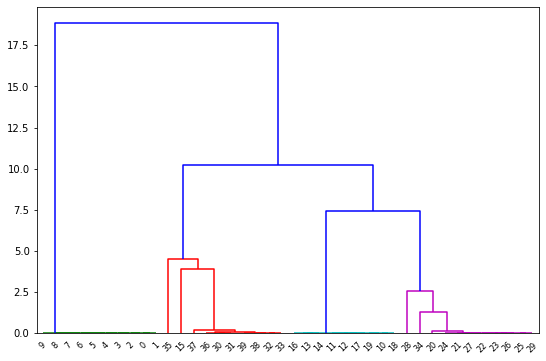

In [0]:
# Hierarchy 分群結果
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

distance_mat = pdist(StandardScaler().fit_transform(new_df))

Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(9, 6))
dn = hierarchy.dendrogram(Z, color_threshold=7.2)
plt.show()

In [0]:
# 從 KMeans 與 Hierarchy 的分群結果可以看到，與我們的推論大致相同，但是唯獨第 15 與 34 筆資料被分到不同群。

# 再回去觀察 Table 可以發現，因為第 15 筆資料的 Section 2 Entropy 特別高，
# 且該觀測值的 Address Entry Point 也與我們原本推論分群的其他觀察值不相同。
# 然而，該觀測值 Section 1 的 SHA 256 value 與原本的第二群是相同的，因此推斷仍是第二個 family！

# 而第 34 筆資料則是可能因為 Address Entry Point 的值與同群的其他觀測值不相同，因此被分群演算法分到其他群，但我認為這不太合理，
# 因為該觀測值 Section 1 的 SHA 256 value 與原本的第四群是相同的，也就是應該還是屬於第四個 family！

# 因此，最後的結論為:
# 第 0 到 9 筆資料為第一個 family;
# 第 10 到 19 筆資料為第二個 family;
# 第 20 到 29 筆資料為第三個 family;
# 第 30 到 39 筆資料為第四個 family